In [1]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, TensorBoard
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from keras.preprocessing.image import img_to_array
from tqdm import tqdm
import math

Using TensorFlow backend.


In [2]:
height = 32
width = 64
channel = 3

In [3]:
clean_data_path = 'D:\\intern\\classified_data\\clean_data\\extra_clean'
noisy_15dB_path = 'D:\\intern\\classified_data\\noisy_data\\15dB\\extra_15dB'
noisy_20dB_path = 'D:\\intern\\classified_data\\noisy_data\\20dB\\extra_20dB'
noisy_25dB_path = 'D:\\intern\\classified_data\\noisy_data\\25dB\\extra_25dB'
noisy_30dB_path = 'D:\\intern\\classified_data\\noisy_data\\30dB\\extra_30dB'
noisy_100dB_path = 'D:\\intern\\classified_data\\noisy_data\\100dB\\extra_100dB'

In [4]:
clean_data_files = os.listdir(clean_data_path)
noisy_15dB_files = os.listdir(noisy_15dB_path)
noisy_20dB_files = os.listdir(noisy_20dB_path)
noisy_25dB_files = os.listdir(noisy_25dB_path)
noisy_30dB_files = os.listdir(noisy_30dB_path)
noisy_100dB_files = os.listdir(noisy_100dB_path)

In [5]:
clean_data = np.zeros((len(clean_data_files), height, width, channel), dtype=np.float32)
noisy_15dB = np.zeros((len(noisy_15dB_files), height, width, channel), dtype=np.float32)
noisy_20dB = np.zeros((len(noisy_20dB_files), height, width, channel), dtype=np.float32)
noisy_25dB = np.zeros((len(noisy_25dB_files), height, width, channel), dtype=np.float32)
noisy_30dB = np.zeros((len(noisy_30dB_files), height, width, channel), dtype=np.float32)
noisy_100dB = np.zeros((len(noisy_100dB_files), height, width, channel), dtype=np.float32)

In [6]:
n=0
for i in tqdm(clean_data_files):
    img = cv2.imread(clean_data_path + '\\' + i, 1)
    img = cv2.resize(img, (width, height)) / 255.
    clean_data[n] = img
    n = n+1

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 697.81it/s]


In [7]:
n=0
for i in tqdm(noisy_20dB_files):
    img = cv2.imread(noisy_20dB_path + '\\' + i, 1)
    img = cv2.resize(img, (width, height)) / 255.
    noisy_20dB[n] = img
    n = n+1

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 637.81it/s]


In [8]:
n=0
for i in tqdm(noisy_25dB_files):
    img = cv2.imread(noisy_25dB_path + '\\' + i, 1)
    img = cv2.resize(img, (width, height)) / 255.
    noisy_25dB[n] = img
    n = n+1

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 684.89it/s]


In [9]:
n=0
for i in tqdm(noisy_30dB_files):
    img = cv2.imread(noisy_30dB_path + '\\' + i, 1)
    img = cv2.resize(img, (width, height)) / 255.
    noisy_30dB[n] = img
    n = n+1

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 692.08it/s]


In [10]:
n=0
for i in tqdm(noisy_100dB_files):
    img = cv2.imread(noisy_100dB_path + '\\' + i, 1)
    img = cv2.resize(img, (width, height)) / 255.
    noisy_100dB[n] = img
    n = n+1

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 712.79it/s]


In [16]:
model = Sequential([
    
  # encoder
    Conv2D(512, (3,3), padding="same", activation="relu", input_shape=(height,width,channel)),
    BatchNormalization(),
    Conv2D(512, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(512, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2),strides=(2,2)),
    
    Conv2D(512, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(512, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(512, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2),strides=(2,2)),
    
    Conv2D(256, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(256, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(256, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2),strides=(2,2)),
    
    Conv2D(128, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(128, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2),strides=(2,2)),
    
    Conv2D(64, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(64, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2),strides=(2,2)),
    
    
    # decoder
    Conv2D(64, (3,3), padding="same", activation="relu"),
    Conv2D(64, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    Conv2D(128, (3,3), padding="same", activation="relu"),
    Conv2D(128, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    Conv2D(256, (3,3), padding="same", activation="relu"),
    Conv2D(256, (3,3), padding="same", activation="relu"),
    Conv2D(256, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    Conv2D(512, (3,3), padding="same", activation="relu"),
    Conv2D(512, (3,3), padding="same", activation="relu"),
    Conv2D(512, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    Conv2D(512, (3,3), padding="same", activation="relu"),
    Conv2D(512, (3,3), padding="same", activation="relu"),
    Conv2D(512, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    
    Conv2D(channel, (3,3), padding="same", activation="sigmoid") # sigmoid, relu    
])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 64, 512)       14336     
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 64, 512)       2048      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 64, 512)       2359808   
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 64, 512)       2048      
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 32, 64, 512)       2359808   
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 64, 512)       2048      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 32, 512)      

In [18]:
early_stop = EarlyStopping(
                monitor='val_loss',
                patience=20, #n of epochs with no improvement which will be stopped training
                verbose=1
            )

log_csv = CSVLogger('logs_100dB.csv',
                   separator=',',
                   append=False
                   )

tensorboard = TensorBoard(
                log_dir='logs_30dB'
            )

callbacks_list = [early_stop, log_csv, tensorboard]

In [19]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(noisy_30dB, clean_data,
          validation_split=0.2,
          batch_size=8,
          epochs=10,
          callbacks=callbacks_list
        )

Train on 400 samples, validate on 100 samples
Epoch 1/10
400/400 [==============================] - 750s 2s/sample - loss: 0.6510 - accuracy: 0.0000e+00 - val_loss: 0.6666 - val_accuracy: 4.8828e-06
Epoch 2/10
400/400 [==============================] - 715s 2s/sample - loss: 0.6455 - accuracy: 0.0000e+00 - val_loss: 0.6622 - val_accuracy: 4.8828e-06
Epoch 3/10
400/400 [==============================] - 757s 2s/sample - loss: 0.6419 - accuracy: 0.0000e+00 - val_loss: 0.6573 - val_accuracy: 4.8828e-06
Epoch 4/10
400/400 [==============================] - 742s 2s/sample - loss: 0.6384 - accuracy: 0.0000e+00 - val_loss: 0.6557 - val_accuracy: 4.8828e-06
Epoch 5/10
400/400 [==============================] - 715s 2s/sample - loss: 0.6368 - accuracy: 0.0000e+00 - val_loss: 0.6602 - val_accuracy: 4.8828e-06
Epoch 6/10
400/400 [==============================] - 692s 2s/sample - loss: 0.6343 - accuracy: 0.0000e+00 - val_loss: 0.6645 - val_accuracy: 4.8828e-06
Epoch 7/10
400/400 [================

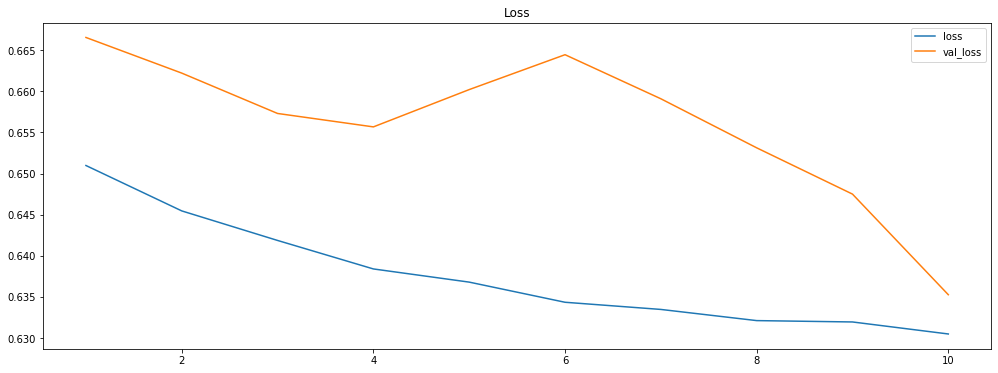

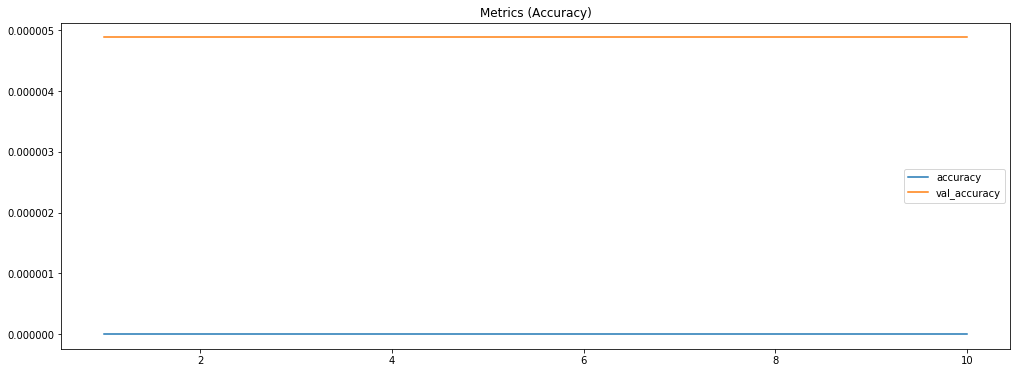

In [22]:
plt.rcParams['figure.figsize'] = (17,6)
fig, ax1 = plt.subplots()
xepochs = range(1,len(history.history['loss']) + 1)

plt.plot(xepochs, history.history['loss'], label = 'loss')
plt.plot(xepochs, history.history['val_loss'], label = 'val_loss')
plt.title('Loss')
plt.legend()
plt.show()

plt.plot(xepochs, history.history['accuracy'], label = 'accuracy')
plt.plot(xepochs, history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Metrics (Accuracy)')
plt.legend()
plt.show()

In [23]:
decoded_15dB = model.predict(noisy_15dB)
decoded_20dB = model.predict(noisy_20dB)
decoded_25dB = model.predict(noisy_25dB)
decoded_30dB = model.predict(noisy_100dB)

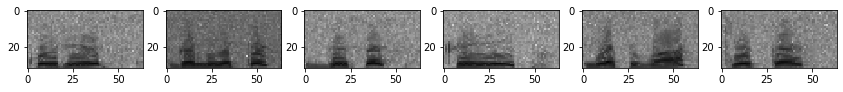

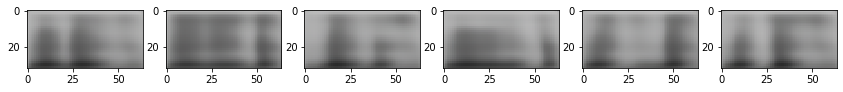

In [24]:
plt.figure(figsize=(17,4))
for i in range(1,7):
    ax = plt.subplot(1,7,i)
    plt.imshow(noisy_20dB[i])
plt.show()

# Displaying prediction_train images
plt.figure(figsize=(17,4))
for i in range(1,7):
    ax = plt.subplot(1,7,i)
    plt.imshow(decoded_20dB[i])
plt.show()

In [25]:
def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * math.log10(max_pixel / math.sqrt(mse)) 
    return psnr

In [26]:
print(f'15dB PSNR mean: {PSNR(noisy_15dB, decoded_15dB)}')

for i in range(len(noisy_15dB)):
    
    value = PSNR(noisy_15dB[i], decoded_15dB[i]) 
    print(f"PSNR value is {value} dB")

15dB PSNR mean: 55.1144126857863
PSNR value is 55.11441494763466 dB
PSNR value is 55.11441494763466 dB
PSNR value is 55.11441494763466 dB
PSNR value is 55.11441494763466 dB
PSNR value is 55.11441494763466 dB
PSNR value is 55.11441494763466 dB
PSNR value is 55.11441494763466 dB
PSNR value is 55.11441494763466 dB
PSNR value is 55.11441494763466 dB
PSNR value is 55.11441494763466 dB
PSNR value is 55.11441494763466 dB
PSNR value is 55.11441494763466 dB
PSNR value is 55.11441494763466 dB
PSNR value is 55.11441494763466 dB
PSNR value is 55.11441494763466 dB
PSNR value is 55.11441494763466 dB
PSNR value is 55.11441494763466 dB
PSNR value is 55.11441494763466 dB
PSNR value is 55.11441494763466 dB
PSNR value is 55.11441494763466 dB
PSNR value is 55.11441494763466 dB
PSNR value is 55.11441494763466 dB
PSNR value is 55.11441494763466 dB
PSNR value is 55.11441494763466 dB
PSNR value is 55.11441494763466 dB
PSNR value is 55.11441494763466 dB
PSNR value is 55.11441494763466 dB
PSNR value is 55.11441

In [28]:
print(f'20dB PSNR mean: {PSNR(noisy_20dB, decoded_20dB)}')

for i in range(len(noisy_20dB)):
    
    value = PSNR(noisy_20dB[i], decoded_20dB[i]) 
    print(f"PSNR value is {value} dB")

20dB PSNR mean: 66.13240276362326
PSNR value is 66.77967708094775 dB
PSNR value is 68.22684273818447 dB
PSNR value is 64.83476903859778 dB
PSNR value is 67.1359174463476 dB
PSNR value is 67.5121047641839 dB
PSNR value is 65.30495484424779 dB
PSNR value is 66.82895660730222 dB
PSNR value is 65.97912070795657 dB
PSNR value is 66.44751982542707 dB
PSNR value is 68.40774663004547 dB
PSNR value is 66.3930242953999 dB
PSNR value is 66.74537962434405 dB
PSNR value is 66.32334340141846 dB
PSNR value is 68.15215337318024 dB
PSNR value is 64.98668188150491 dB
PSNR value is 66.15594964849865 dB
PSNR value is 64.66366584721379 dB
PSNR value is 66.6071878829217 dB
PSNR value is 65.32035237483824 dB
PSNR value is 65.4050238391924 dB
PSNR value is 67.67674646922276 dB
PSNR value is 66.28681062482373 dB
PSNR value is 67.94147031592495 dB
PSNR value is 64.7010182088613 dB
PSNR value is 65.29100051799365 dB
PSNR value is 65.86834172958464 dB
PSNR value is 65.08956922191472 dB
PSNR value is 66.3567670946

In [29]:
print(f'25dB PSNR mean: {PSNR(noisy_25dB, decoded_25dB)}')

for i in range(len(noisy_25dB)):
    
    value = PSNR(noisy_25dB[i], decoded_25dB[i]) 
    print(f"PSNR value is {value} dB")

25dB PSNR mean: 66.95549569674482
PSNR value is 68.81811702091368 dB
PSNR value is 68.70515375332094 dB
PSNR value is 65.92299045290532 dB
PSNR value is 68.13052180052101 dB
PSNR value is 67.12506088018272 dB
PSNR value is 66.16464916766701 dB
PSNR value is 68.36156905769661 dB
PSNR value is 66.71434421230433 dB
PSNR value is 68.42996582839513 dB
PSNR value is 68.6040729796518 dB
PSNR value is 67.46079454907566 dB
PSNR value is 68.18557736241856 dB
PSNR value is 68.12072029719505 dB
PSNR value is 68.88777352504792 dB
PSNR value is 66.73925617593669 dB
PSNR value is 66.1943082741426 dB
PSNR value is 66.2801182558503 dB
PSNR value is 68.20356536043423 dB
PSNR value is 64.06014571121864 dB
PSNR value is 66.31562910729072 dB
PSNR value is 68.39834330220113 dB
PSNR value is 65.67873222347708 dB
PSNR value is 68.24142903873539 dB
PSNR value is 66.17873407196976 dB
PSNR value is 67.54678607537676 dB
PSNR value is 67.57629406476796 dB
PSNR value is 65.90912531855642 dB
PSNR value is 67.4741156

In [31]:
print(f'100dB PSNR mean: {PSNR(noisy_100dB, decoded_30dB)}')

for i in range(len(noisy_100dB)):
    
    value = PSNR(noisy_100dB[i], decoded_30dB[i]) 
    print(f"PSNR value is {value} dB")

100dB PSNR mean: 62.14683399773932
PSNR value is 66.8476894993307 dB
PSNR value is 68.89931701276294 dB
PSNR value is 69.8396189272037 dB
PSNR value is 66.86832323493434 dB
PSNR value is 69.01485693084832 dB
PSNR value is 68.05676905454398 dB
PSNR value is 69.29607954167633 dB
PSNR value is 55.66204096140772 dB
PSNR value is 65.4031879861225 dB
PSNR value is 69.1391764692759 dB
PSNR value is 67.54281652525269 dB
PSNR value is 68.13539806325895 dB
PSNR value is 68.34356756348585 dB
PSNR value is 67.97651363227595 dB
PSNR value is 55.66204096140772 dB
PSNR value is 67.72895885934845 dB
PSNR value is 55.66204096140772 dB
PSNR value is 68.26267585137296 dB
PSNR value is 66.58156456606937 dB
PSNR value is 65.68666480144658 dB
PSNR value is 68.18695916896684 dB
PSNR value is 68.54474216558843 dB
PSNR value is 68.09882153705301 dB
PSNR value is 55.66204096140772 dB
PSNR value is 67.69048980490064 dB
PSNR value is 69.10683861877486 dB
PSNR value is 66.02259320365486 dB
PSNR value is 55.6620409